 **Loading Data from Different Formats**
 ****

In [ ]:
import pandas as pd
import xml.etree.ElementTree as ET
import json

# Load text file
def load_text_file(file_path):
    with open(file_path, 'r') as file:
        data = file.read()
    return data

# Load CSV file
def load_csv_file():
    return pd.read_csv('/content/data.csv')

# Load HTML file
def load_html_file(filepath='/content/data.html'):
    return pd.read_html(filepath)[0]  # First table

# Load XML file
def load_xml_file(xml_file_path='/content/data.xml'):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    data = []
    for elem in root:
        record = {}
        for subelem in elem:
            record[subelem.tag] = subelem.text
        data.append(record)
    return pd.DataFrame(data)

# Load JSON file
def load_json_file():
    with open('/content/data.json', 'r') as file:
        data = json.load(file)
    return pd.json_normalize(data)


** Checking for Data Quality Issues**

In [ ]:
from scipy import stats

# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values per column:\n", missing_values)
    return missing_values

# Check for duplicates
def check_duplicates(df):
    duplicate_rows = df.duplicated().sum()
    print("Duplicate rows:", duplicate_rows)
    return duplicate_rows

# Detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))  # Only numeric data
    abs_z_scores = abs(z_scores)
    outliers = (abs_z_scores > threshold).any(axis=1)
    print(f"Found {outliers.sum()} outliers.")
    return df[outliers]


# **Creating a Relational Database with SQLAlchemy**

In [ ]:
from sqlalchemy import create_engine, Column, Integer, String, Float
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Database setup
engine = create_engine('sqlite:///mydatabase.db', echo=False)  # SQLite database
Base = declarative_base()

# Define User table
class User(Base):
    __tablename__ = 'users'
    id = Column(Integer, primary_key=True)
    name = Column(String)
    age = Column(Integer)
    email = Column(String)

# Define Order table
class Order(Base):
    __tablename__ = 'orders'
    id = Column(Integer, primary_key=True)
    amount = Column(Float)
    user_id = Column(Integer)

# Create tables in the database
Base.metadata.create_all(engine)

# Create a session
Session = sessionmaker(bind=engine)
session = Session()


<ipython-input-24-e6f8a9d41391>:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


# **Perform CRUD (Create, Read, Update, Delete) Operations**

In [ ]:
# Create (Insert a new user)
def add_user(name, age, email):
    user = User(name=name, age=age, email=email)
    session.add(user)
    session.commit()
    print(f"Added user: {name}, {age}, {email}")

# Create (Insert a new order)
def add_order(user_id, amount):
    order = Order(amount=amount, user_id=user_id)
    session.add(order)
    session.commit()
    print(f"Added order: User ID {user_id}, Amount {amount}")


Read Operation:

In [ ]:
# Read (Fetch users)
def get_users():
    users = session.query(User).all()
    for user in users:
        print(f"ID: {user.id}, Name: {user.name}, Age: {user.age}, Email: {user.email}")


Update Operation

In [ ]:
# Update (Modify a user)
def update_user(user_id, new_name):
    user = session.query(User).filter_by(id=user_id).first()
    if user:
        old_name = user.name
        user.name = new_name
        session.commit()
        print(f"Updated user {old_name} to {new_name}")


Delete Operation

In [ ]:
# Delete (Remove a user)
def delete_user(user_id):
    user = session.query(User).filter_by(id=user_id).first()
    if user:
        session.delete(user)
        session.commit()
        print(f"Deleted user with ID {user_id}")


Example Usage

In [ ]:
# Load CSV file
csv_data = load_csv_file()

# Check for data quality issues
check_missing_values(csv_data)
check_duplicates(csv_data)
outliers = detect_outliers_zscore(csv_data)

# Perform CRUD operations
add_user('John Doe', 30, 'john@example.com')
add_order(1, 100.50)
get_users()
update_user(1, 'Jane Doe')
delete_user(1)


Missing values per column:
 name     0
age      0
email    0
dtype: int64
Duplicate rows: 0
Found 0 outliers.
Added user: John Doe, 30, john@example.com
Added order: User ID 1, Amount 100.5
ID: 1, Name: John Doe, Age: 30, Email: john@example.com
Updated user John Doe to Jane Doe
Deleted user with ID 1


program **2**

Name,Age,Salary,Department
Alice,25,50000,Engineering
Bob,,48000,Sales
Charlie,35,,Marketing
David,45,70000,Engineering
Eve,29,55000,Sales
     data.csv

Initial Missing Values:
 Name          0
Age           1
Salary        1
Department    0
dtype: int64
After Filling Missing Values:
 Name          0
Age           0
Salary        0
Department    0
dtype: int64
Data after transformation:
       Name   Age   Salary   Department
0    Alice  26.0  50000.0  ENGINEERING
1      Bob  34.5  48000.0        SALES
2  Charlie  36.0  55750.0    MARKETING
3    David  46.0  70000.0  ENGINEERING
4      Eve  30.0  55000.0        SALES
Detected Outliers:
     Name   Age   Salary   Department
3  David  46.0  70000.0  ENGINEERING
Data after string operations:
       Name  Name_Length Name_Upper
0    Alice            5      ALICE
1      Bob            3        BOB
2  Charlie            7    CHARLIE
4      Eve            3        EVE


<ipython-input-1-8f39ee646f96>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-1-8f39ee646f96>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

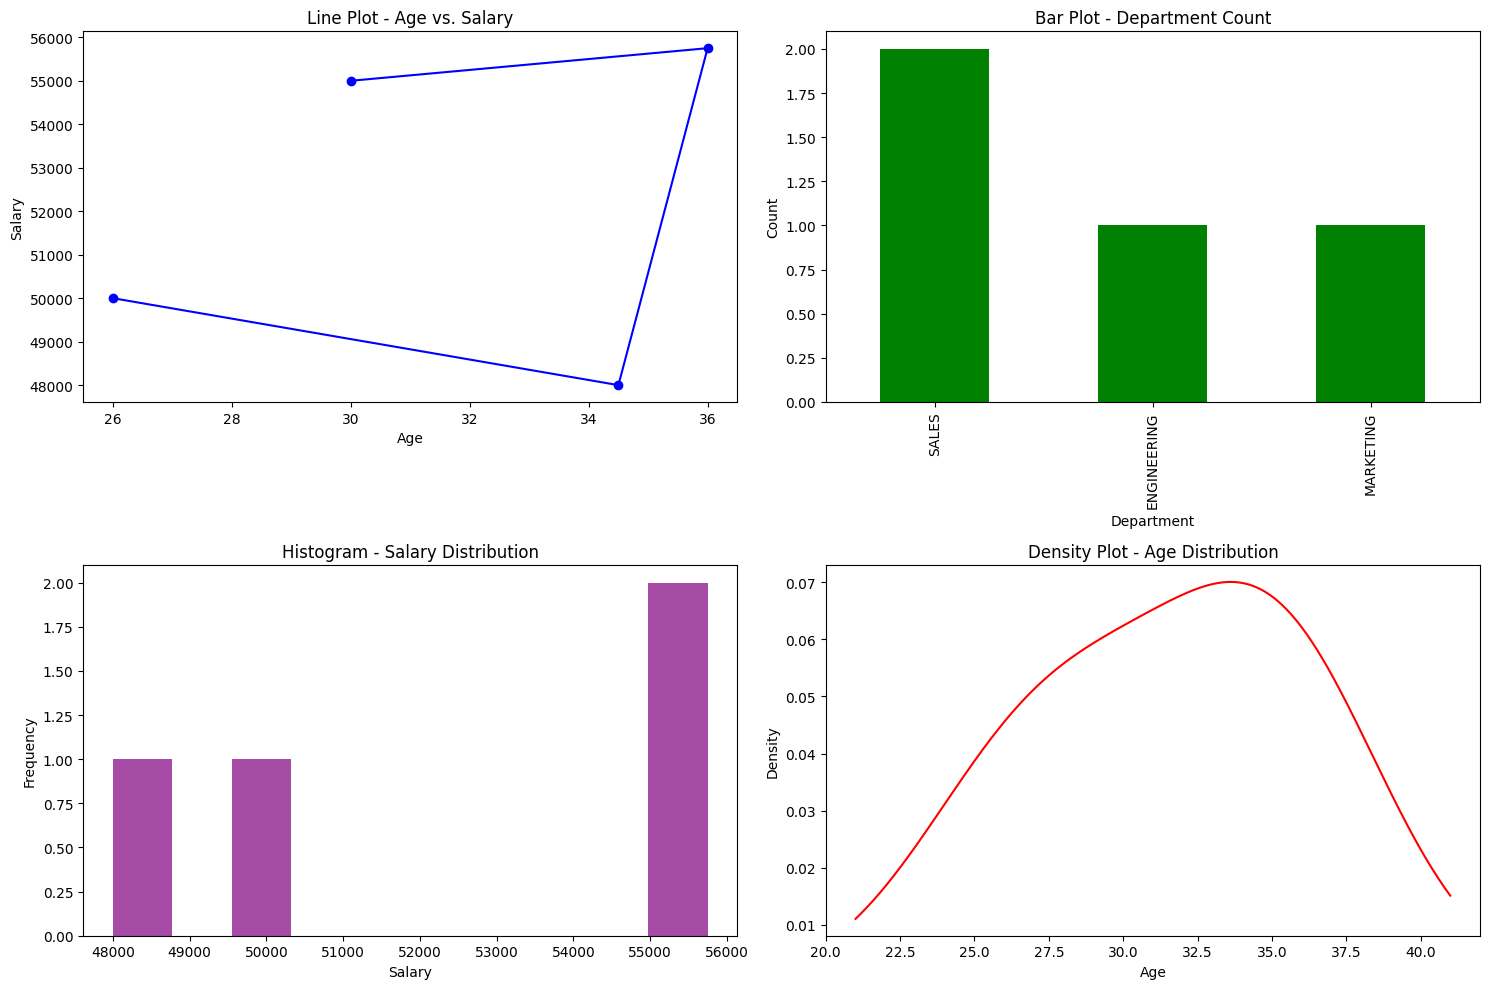

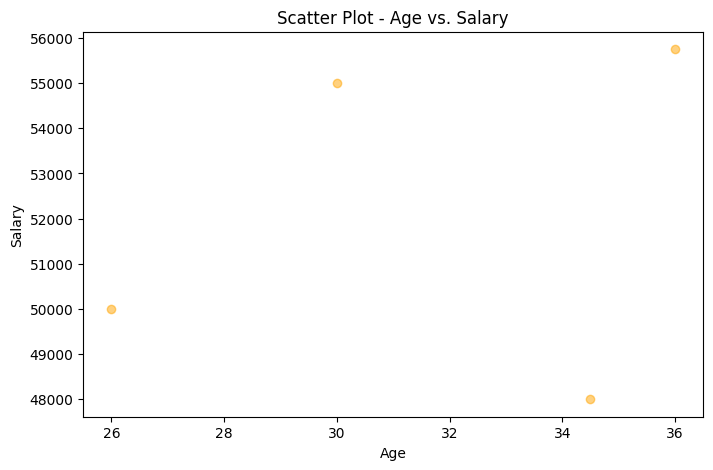

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
data = pd.read_csv('/content/data.csv')

# a. Handle Missing Data
def handle_missing_data(df):
    print("Initial Missing Values:\n", df.isnull().sum())

    # Fill missing numerical values with the mean
    for column in df.select_dtypes(include=[np.number]).columns:
        df[column].fillna(df[column].mean(), inplace=True)

    # Fill missing categorical values with a placeholder
    for column in df.select_dtypes(include=[object]).columns:
        df[column].fillna("Unknown", inplace=True)

    print("After Filling Missing Values:\n", df.isnull().sum())
    return df

# b. Transform Data Using `apply()` and `map()`
def transform_data(df):
    # Using `apply` to increase age by 1
    df['Age'] = df['Age'].apply(lambda x: x + 1 if pd.notnull(x) else x)

    # Using `map` to transform Department names to uppercase
    df['Department'] = df['Department'].map(lambda x: x.upper() if isinstance(x, str) else x)

    print("Data after transformation:\n", df.head())
    return df

# c. Detect and Filter Outliers
def detect_outliers(df):
    # For simplicity, detecting outliers in the 'Salary' column using IQR method
    Q1 = df['Salary'].quantile(0.25)
    Q3 = df['Salary'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))
    outliers = df[outlier_condition]

    print("Detected Outliers:\n", outliers)
    df = df[~outlier_condition]  # Removing outliers
    return df

# d. Perform Vectorized String Operations
def string_operations(df):
    # Assuming 'Name' column has string data
    df['Name_Length'] = df['Name'].str.len()  # Get length of each name
    df['Name_Upper'] = df['Name'].str.upper()  # Convert names to uppercase

    print("Data after string operations:\n", df[['Name', 'Name_Length', 'Name_Upper']].head())
    return df

# e. Visualize Data
def visualize_data(df):
    plt.figure(figsize=(15, 10))

    # Line Plot for Age vs. Salary
    plt.subplot(2, 2, 1)
    plt.plot(df['Age'], df['Salary'], marker='o', color='b')
    plt.title("Line Plot - Age vs. Salary")
    plt.xlabel("Age")
    plt.ylabel("Salary")

    # Bar Plot for Department Count
    plt.subplot(2, 2, 2)
    df['Department'].value_counts().plot(kind='bar', color='g')
    plt.title("Bar Plot - Department Count")
    plt.xlabel("Department")
    plt.ylabel("Count")

    # Histogram for Salary
    plt.subplot(2, 2, 3)
    df['Salary'].plot(kind='hist', bins=10, color='purple', alpha=0.7)
    plt.title("Histogram - Salary Distribution")
    plt.xlabel("Salary")

    # Density Plot for Age
    plt.subplot(2, 2, 4)
    df['Age'].plot(kind='density', color='red')
    plt.title("Density Plot - Age Distribution")
    plt.xlabel("Age")

    plt.tight_layout()
    plt.show()

    # Scatter Plot for Age vs. Salary
    plt.figure(figsize=(8, 5))
    plt.scatter(df['Age'], df['Salary'], color='orange', alpha=0.5)
    plt.title("Scatter Plot - Age vs. Salary")
    plt.xlabel("Age")
    plt.ylabel("Salary")
    plt.show()

# Running all the functions in sequence
data = handle_missing_data(data)
data = transform_data(data)
data = detect_outliers(data)
data = string_operations(data)
visualize_data(data)


program 3:
Name,Age,Salary,Department
Alice,25,50000,Engineering
Bob,30,48000,Sales
Charlie,35,52000,Marketing
data.csv

In [ ]:
import csv

# Path to the CSV file
file_path = 'data.csv'

# Open the CSV file and read each row
with open(file_path, mode='r') as file:
    csv_reader = csv.reader(file)

    # Iterate over each row in the CSV file
    for row in csv_reader:
        # Convert each row to a list of strings and print it
        print([str(item) for item in row])


4:write a python pgm to read a csv file as dictionary  


Name,Age,Salary,Department
Alice,25,50000,Engineering
Bob,30,48000,Sales
Charlie,35,52000,Marketing
data.csv

In [1]:
import csv

# Path to the CSV file
file_path = 'data.csv'

# Open the CSV file and read it as a dictionary
with open(file_path, mode='r') as file:
    csv_reader = csv.DictReader(file)

    # Convert each row to a dictionary and print it
    for row in csv_reader:
        print(dict(row))


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

program 5:

In [ ]:
import json

# Sample dictionary with nested data
data = {
    "Name": "Alice",
    "Age": 25,
    "Salary": 50000,
    "Department": {
        "Name": "Engineering",
        "Location": "New York",
        "Projects": {
            "Project1": "AI Development",
            "Project2": {
                "Name": "Machine Learning",
                "Team": {
                    "Lead": "Alice",
                    "Members": ["Bob", "Charlie", "Dave"]
                }
            }
        }
    }
}

# Sort dictionary by keys
sorted_data = dict(sorted(data.items()))

# Convert to JSON
json_data = json.dumps(sorted_data, indent=4)

# Print JSON data
print("JSON Data:\n", json_data)

# Function to print members up to a specified nesting level
def print_nested(data, level=1, max_level=4):
    """Recursively prints dictionary members up to max_level."""
    if level > max_level:
        return
    if isinstance(data, dict):
        for key, value in data.items():
            print(" " * (level - 1) * 4 + f"{key}:")
            print_nested(value, level + 1, max_level)
    elif isinstance(data, list):
        for item in data:
            print_nested(item, level, max_level)
    else:
        print(" " * (level - 1) * 4 + str(data))

print("\nDictionary Members up to Level 4:")
print_nested(sorted_data)


program 6:


<company>
    <employee id="1">
        <name>Alice</name>
        <age>25</age>
        <department>Engineering</department>
    </employee>
    <employee id="2">
        <name>Bob</name>
        <age>30</age>
        <department>Sales</department>
    </employee>
</company>


data.xml

In [ ]:
import xml.etree.ElementTree as ET

# Load and parse the XML file
file_path = 'data.xml'
tree = ET.parse(file_path)
root = tree.getroot()

# Function to print XML elements, attributes, and text content
def print_xml_elements(element, level=0):
    indent = " " * (level * 4)
    print(f"{indent}Tag: {element.tag}, Attributes: {element.attrib}")

    # If element has text, print the text
    if element.text and element.text.strip():
        print(f"{indent}  Text: {element.text.strip()}")

    # Recursively print child elements
    for child in element:
        print_xml_elements(child, level + 1)

# Print the root element and its children
print("XML File Content:")
print_xml_elements(root)


program 6:

In [ ]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
file_path = 'child_labour_and_child_marriage_data.xlsx'
df = pd.read_excel(file_path)

# Task a: Get the data types of each column
print("Data types of each column:")
print(df.dtypes)

# Task b: Display the last 10 rows
print("\nLast 10 rows of the data:")
print(df.tail(10))

# Task c: Insert a new column at the 6th position with a default value
df.insert(5, 'NewColumn', 'N/A')  # Insert a new column at index 5 (6th position) with value 'N/A'

# Display the updated DataFrame with the new column
print("\nData after adding a new column at the 6th position:")
print(df.head())  # Display first few rows to show the new column
